## Outbreak in a non-enclosed and heterogeneous population

## Background

The FPSO example we have simulated represents an enclosed environment in which the introduction of virus could be stricly controlled. However,  most factories are not enclosed and would be exposed to surrounding communities and be at the risk of injection of virus.

This project simulates a factory with a on-going COVID-19 outbreak, complicated by the flow of workers with its surronding communities.

## Assumptions

1. There are 20000 workers and 2000 contractors in the factory
2. An outbreak is happening with an incidence rate of 0.002 and population seroprevalence of 0.05.
3. Ten contractors will arrive at the factory, and on average 10% of them carries the SARS-CoV-2 virus. The carrier can be pre-symptomatic or asymptomatic.
4. Workers are generally young and fit and are less susceptible than contractors, this is reflected by susceptibility coeffients 0.9 and 1.1 for two different groups. We also assume that contractors are more infectious than workers because they are in contact with more people in the factory.

## Simulation

The simulation is performed by the following command

In [1]:
outbreak_simulator -j1 --rep 10 --stop-if 't>60' \
  --popsize worker=20000 contractor=2000 --handle-symptomatic quarantine \
  --susceptibility worker=0.9 contractor=1.1 \
  --symptomatic-r0 worker=0.9 contractor=1.1 \
  --asymptomatic-r0 worker=0.9 contractor=1.1 \
  --logfile nonenclosed.log \
  --plugin stat --interval 1 \
  --plugin insert contractor=20 --prop-of-infected 0.1 --leadtime asymptomatic --interval 1 \
  --plugin remove contractor=20 --interval 1\
  > nonenclosed.txt

100%|███████████████████████████████████████████| 10/10 [01:09<00:00,  6.91s/it]



where 
1. `--poopsize` specifies number of workers and contractors
2. `--susceptibility`, `--symptomatic-r0`, `--asymtpmatic-r0` specifies relative susceptibility and infectibity for workers and contractors.
3. Plugin `stat` reports statistics for the entire population and for workers and contractors
4. Plugin `insert` inserts 10 contractors to the population everyday with `10%` of them carrying the virus.

## Results

Although a large number of statistics such as number of affected, recovered, seroprevalence in contractor and workers are reported, we extract the following statistics from the output of the simulations (`nonenclosed.txt`) for this report:

1. `avg_contractor_incidence_rate_0.00` to `avg_contractor_incidence_rate_90.00` as incidence rate among contractors for 10 replicate simulations.
2. `avg_worker_incidence_rate_0.00` to `avg_worker_incidence_rate_90.00` as incidence rate among workers for 10 replicate simulations.

In [2]:
import pandas as pd
def get_seq(filename, field_name):
    result = {}
    with open(filename) as stat:
        for line in stat:
            if line.startswith(field_name):
                key, value = line.strip().split('\t')
                t = int(key[len(field_name)+1:].split('.')[0])
                #if ':' in value:
                #    value = eval('{' + value + '}')
                #else:
                #    value = {idx+1:value for idx, value in enumerate(eval(value))}
                value = eval(value)[0]
                result[t] = value
              
    #return pd.DataFrame(result).transpose()[[x for x in range(1, 101)]]
    return result

In [3]:
avg_contractor_incidence_rate = get_seq('nonenclosed.txt', 'avg_contractor_incidence_rate')
avg_worker_incidence_rate = get_seq('nonenclosed.txt', 'avg_worker_incidence_rate')

avg_incidence_rate = pd.DataFrame({
    'contractor_incidence_rate': list(avg_contractor_incidence_rate.values()),
    'worker_incidence_rate': list(avg_worker_incidence_rate.values()),
    },
    index=list(avg_contractor_incidence_rate.keys())
)

The following figure shows the change of incidence rate for 10 replicate simulations. The population does not have any case from the beginning until the incoming contractors brought the virus to the worker population. The contractors are the source of infection and are more susceptible so the incidence rate among contractors were always higher than that of the workers.

<AxesSubplot:xlabel='days', ylabel='incidence rate'>

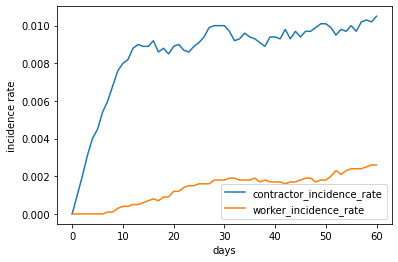

In [4]:
avg_incidence_rate.plot(xlabel='days', ylabel='incidence rate')

## Availability

This notebook is available under the `Applications` directory of the [GitHub repository](https://github.com/ictr/covid19-outbreak-simulator) of the COVID19 Outbreak Simulator. It can be executed with [`sos-papermill`](https://github.com/vatlab/sos-papermill) with the following parameters, or using a docker image `bcmictr/outbreak-simulator-notebook` as described in [here](/covid19-outbreak-simulator/docs/cli/).